# Question 1 

### Speech Denoising Using Deep Learning

In [51]:
import librosa
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import tensorflow.keras.initializers as initializers


In [52]:
s, sr=librosa.load("data/train_clean_male.wav", sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load("data/train_dirty_male.wav", sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)

In [53]:
S = np.abs(S)
X = np.abs(X)

In [54]:
print(S.shape)
print(X.shape)

(513, 2459)
(513, 2459)


In [55]:
model = models.Sequential([
    layers.Input(shape=(513,)),
    layers.Dense(1024, activation='relu',kernel_initializer=initializers.glorot_normal()),
    layers.Dense(1024, activation='relu',kernel_initializer=initializers.glorot_normal()),
    layers.Dense(513, activation='relu',kernel_initializer=initializers.glorot_normal())
])

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='mean_squared_error')

num_epochs = 500
batch_size = 32

X = X.T
S = S.T

history=model.fit(X, S, batch_size=batch_size, epochs=num_epochs, verbose=1)

Epoch 1/500
77/77 [==============================] - 1s 3ms/step - loss: 0.0621
Epoch 2/500
77/77 [==============================] - 0s 3ms/step - loss: 0.0317
Epoch 3/500
77/77 [==============================] - 0s 3ms/step - loss: 0.0205
Epoch 4/500
77/77 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 5/500
77/77 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 6/500
77/77 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 7/500
77/77 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 8/500
77/77 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 9/500
77/77 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 10/500
77/77 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 11/500
77/77 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 12/500
77/77 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 13/500
77/77 [=================

In [56]:
model_path = 'models/q1_denoiser_model.h5' 
model.save(model_path)

print("Model saved to", model_path)


Model saved to models/q1_denoiser_model.h5


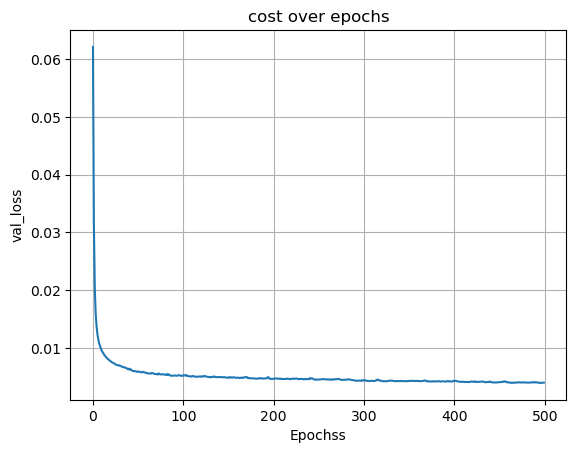

In [57]:
plt.plot(history.history['loss'])
plt.xlabel("Epochss")
plt.ylabel("val_loss")
# plt.ylim(0,0.01)
plt.title("cost over epochs")
plt.grid(True)
plt.show()

In [32]:
X_test, sr = librosa.load('data/test_x_01.wav', sr=None)
X_test =librosa.stft(X_test, n_fft=1024, hop_length=512)
X_test_abs = np.abs(X_test)

predicted_S_test = model.predict(X_test_abs.T).T
cleaned_S_test = np.multiply((X_test/X_test_abs) , np.abs(predicted_S_test))
cleaned_signal = librosa.istft(cleaned_S_test, hop_length=512)
sf.write('data/q1_test_s_01_recons.wav', cleaned_signal, sr)
print(cleaned_signal.shape)

ground_truth,sr =librosa.load("data/test_s_01.wav", sr=None)
ground_truth = ground_truth[:len(cleaned_signal)]
print(ground_truth.shape)

5/5 [==============================] - 0s 2ms/step
(72192,)
(72192,)


In [58]:
some_var = 'data/q1_test_s_01_recons.wav'
show_player = 1
if show_player == 1:
    display(Audio(some_var, autoplay=False))

In [34]:
snr= 10 * np.log10(np.sum(ground_truth**2) / (np.sum((ground_truth - cleaned_signal)**2) + 1e-20))
print(snr)

10.055314317946847


* SNR for test_s_01 by Deep Learning is 10.055 

In [35]:
X_test_02, sr = librosa.load('data/test_x_02.wav', sr=None)
X_test_02 =librosa.stft(X_test_02, n_fft=1024, hop_length=512)
X_test_02_abs = np.abs(X_test_02)

predicted_S_test_02 = model.predict(X_test_02_abs.T).T
cleaned_S_test_02 = np.multiply((X_test_02/X_test_02_abs) , np.abs(predicted_S_test_02))
cleaned_signal_02 = librosa.istft(cleaned_S_test_02, hop_length=512)
sf.write('data/q1_test_s_02_recons.wav', cleaned_signal_02, sr)


12/12 [==============================] - 0s 2ms/step


In [36]:
from IPython.display import Audio, display
some_var = 'data/q1_test_s_02_recons.wav'
show_player = 1
if show_player == 1:
    display(Audio(some_var, autoplay=False))

# Question 2

### Speech Denoising Using 1D CNN

In [37]:
s, sr=librosa.load("data/train_clean_male.wav", sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load("data/train_dirty_male.wav", sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)
S = np.abs(S)
X = np.abs(X)

In [38]:
S = S.T  
X = X.T  


In [39]:
print(S.shape)
print(X.shape)

(2459, 513)
(2459, 513)


In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=18, kernel_size=2, input_shape=(513, 1), activation='relu'),
    tf.keras.layers.Conv1D(filters=36, kernel_size=2, input_shape=(513, 1), activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(513, activation='relu') 
])
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='mean_squared_error')

num_epochs = 500
batch_size = 32

history=model.fit(X, S, batch_size=batch_size, epochs=num_epochs, verbose=1)

Epoch 1/500
77/77 [==============================] - 1s 8ms/step - loss: 0.0757
Epoch 2/500
77/77 [==============================] - 1s 7ms/step - loss: 0.0577
Epoch 3/500
77/77 [==============================] - 1s 7ms/step - loss: 0.0464
Epoch 4/500
77/77 [==============================] - 1s 7ms/step - loss: 0.0368
Epoch 5/500
77/77 [==============================] - 1s 7ms/step - loss: 0.0287
Epoch 6/500
77/77 [==============================] - 1s 7ms/step - loss: 0.0226
Epoch 7/500
77/77 [==============================] - 1s 7ms/step - loss: 0.0181
Epoch 8/500
77/77 [==============================] - 1s 7ms/step - loss: 0.0150
Epoch 9/500
77/77 [==============================] - 1s 7ms/step - loss: 0.0128
Epoch 10/500
77/77 [==============================] - 1s 7ms/step - loss: 0.0111
Epoch 11/500
77/77 [==============================] - 1s 7ms/step - loss: 0.0099
Epoch 12/500
77/77 [==============================] - 1s 7ms/step - loss: 0.0089
Epoch 13/500
77/77 [=================

In [41]:
model_path = 'models/q2_denoiser_1dcnn_model.h5' 
model.save(model_path)

print("Model saved to", model_path)


Model saved to models/q2_denoiser_1dcnn_model.h5


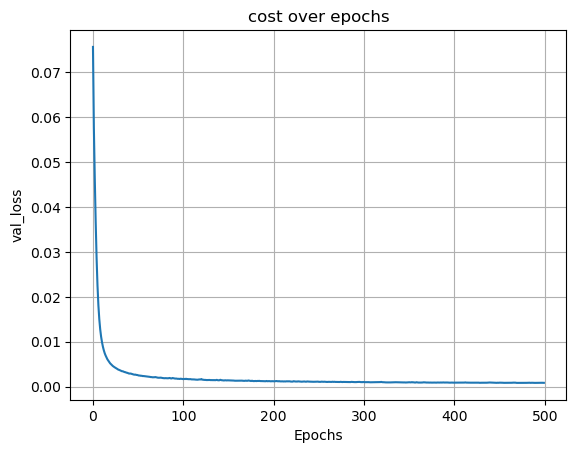

In [42]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("val_loss")
plt.title("cost over epochs")
plt.grid(True)
plt.show()

In [43]:
X_test, sr = librosa.load('data/test_x_01.wav', sr=None)
X_test =librosa.stft(X_test, n_fft=1024, hop_length=512)
X_test_abs = np.abs(X_test)

predicted_S_test = model.predict(X_test_abs.T).T
cleaned_S_test = np.multiply((X_test/X_test_abs) , np.abs(predicted_S_test))
cleaned_signal = librosa.istft(cleaned_S_test, hop_length=512)
sf.write('data/q2_test_s_01_recons.wav', cleaned_signal, sr)
print(cleaned_signal.shape)

ground_truth,sr =librosa.load("data/test_s_01.wav", sr=None)
ground_truth = ground_truth[:len(cleaned_signal)]
print(ground_truth.shape)

5/5 [==============================] - 0s 3ms/step
(72192,)
(72192,)


In [44]:
from IPython.display import Audio, display
some_var = 'data/q2_test_s_01_recons.wav'
show_player = 1
if show_player == 1:
    display(Audio(some_var, autoplay=False))

In [45]:
snr= 10 * np.log10(np.sum(ground_truth**2) / (np.sum((ground_truth - cleaned_signal)**2) + 1e-20))
print(snr)

12.387913105964369


* SNR for test_s_01 by 1D CNN is 12.3879  

In [46]:
X_test_02, sr = librosa.load('data/test_x_02.wav', sr=None)
X_test_02 =librosa.stft(X_test_02, n_fft=1024, hop_length=512)
X_test_02_abs = np.abs(X_test_02)

predicted_S_test_02 = model.predict(X_test_02_abs.T).T
cleaned_S_test_02 = np.multiply((X_test_02/X_test_02_abs) , np.abs(predicted_S_test_02))
cleaned_signal_02 = librosa.istft(cleaned_S_test_02, hop_length=512)
sf.write('data/q2_test_s_02_recons.wav', cleaned_signal_02, sr)


12/12 [==============================] - 0s 3ms/step


In [47]:
from IPython.display import Audio, display
some_var = 'data/q2_test_s_02_recons.wav'
show_player = 1
if show_player == 1:
    display(Audio(some_var, autoplay=False))

# Question 3

### Baseline CNN Classifier

In [12]:
import tensorflow as tf

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.cifar10.load_data()

validation_split = 0.1
num_validation_samples = int(validation_split * len(train_data))

validation_data = train_data[:num_validation_samples]
validation_labels = train_labels[:num_validation_samples]

train_data = train_data[num_validation_samples:]
train_labels = train_labels[num_validation_samples:]

train_data = train_data / 255.0
validation_data = validation_data / 255.0
test_data = test_data / 255.0

train_data = (train_data - 0.5) * 2.0
validation_data = (validation_data - 0.5) * 2.0
test_data = (test_data - 0.5) * 2.0

print("Training data shape:", train_data.shape)
print("Validation data shape:", validation_data.shape)
print("Test data shape:", test_data.shape)


Training data shape: (45000, 32, 32, 3)
Validation data shape: (5000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [55]:
model = models.Sequential([
    layers.Conv2D(10, (5, 5), activation='relu', kernel_initializer='he_normal',input_shape=(32, 32, 3),strides=(1, 1)
),  layers.MaxPooling2D((2, 2), strides=(2, 2)),
    layers.Conv2D(10, (5, 5), activation='relu', kernel_initializer='he_normal',  strides=(1, 1)),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(20, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(10, activation='softmax', kernel_initializer='he_normal')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
epochs = 200  
batch_size = 64
history = model.fit(train_data, train_labels, epochs=epochs,batch_size=batch_size, validation_data=(validation_data, validation_labels))

Epoch 1/200
704/704 [==============================] - 8s 9ms/step - loss: 1.7521 - accuracy: 0.3636 - val_loss: 1.5027 - val_accuracy: 0.4568
Epoch 2/200
704/704 [==============================] - 6s 8ms/step - loss: 1.4199 - accuracy: 0.4887 - val_loss: 1.3434 - val_accuracy: 0.5156
Epoch 3/200
704/704 [==============================] - 6s 9ms/step - loss: 1.3162 - accuracy: 0.5315 - val_loss: 1.2855 - val_accuracy: 0.5470
Epoch 4/200
704/704 [==============================] - 6s 9ms/step - loss: 1.2565 - accuracy: 0.5521 - val_loss: 1.2268 - val_accuracy: 0.5680
Epoch 5/200
704/704 [==============================] - 6s 9ms/step - loss: 1.2092 - accuracy: 0.5737 - val_loss: 1.1985 - val_accuracy: 0.5738
Epoch 6/200
704/704 [==============================] - 6s 9ms/step - loss: 1.1733 - accuracy: 0.5850 - val_loss: 1.1710 - val_accuracy: 0.5918
Epoch 7/200
704/704 [==============================] - 6s 9ms/step - loss: 1.1476 - accuracy: 0.5956 - val_loss: 1.1540 - val_accuracy: 0.5978

In [14]:
model_path = 'models/q3_baseline_model.h5' 
model.save(model_path)

print("Model saved to", model_path)


Model saved to models/q3_baseline_model.h5


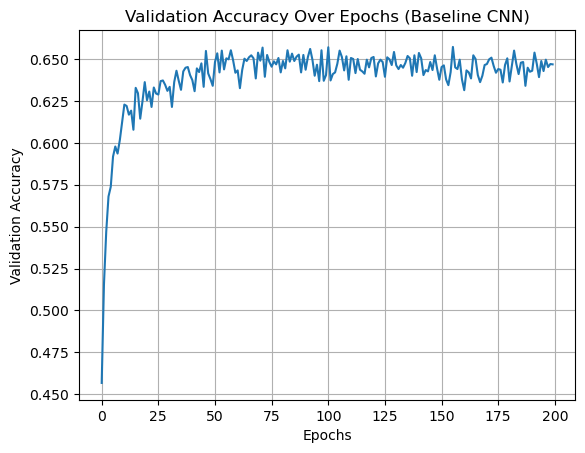

In [15]:
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Over Epochs (Baseline CNN)')
plt.grid(True)
plt.show()

### Classifier Using Augmented Dataset

In [56]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.cifar10.load_data()

validation_split = 0.1
num_validation_samples = int(validation_split * len(train_data))

validation_data = train_data[:num_validation_samples]
validation_labels = train_labels[:num_validation_samples]

train_data = train_data[num_validation_samples:]
train_labels = train_labels[num_validation_samples:]

train_data = train_data / 255.0
validation_data = validation_data / 255.0
test_data = test_data / 255.0

augmented_data_bright = np.minimum(1.1 * train_data, 1.0)

augmented_data_dark = 0.9 * train_data

augmented_data_flip = np.flip(train_data, axis=2)

augmented_data_original = train_data

merged_train_data = np.concatenate((augmented_data_original, augmented_data_bright, augmented_data_dark, augmented_data_flip), axis=0)
merged_train_labels = np.concatenate((train_labels, train_labels, train_labels, train_labels), axis=0)

print("Merged Training data shape:", merged_train_data.shape)
print("Validation data shape:", validation_data.shape)
print("Test data shape:", test_data.shape)

Merged Training data shape: (180000, 32, 32, 3)
Validation data shape: (5000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


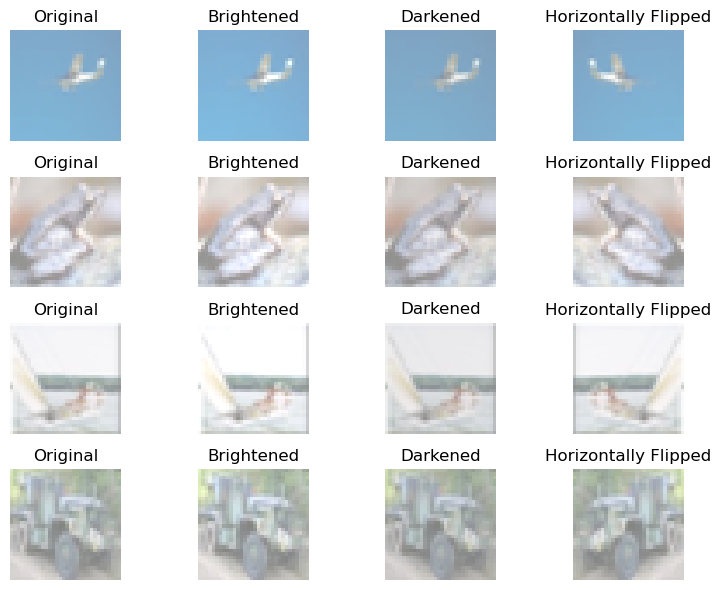

In [62]:
import matplotlib.pyplot as plt

sample_indices = [10, 20, 30, 40]  
titles = ['Original', 'Brightened', 'Darkened', 'Horizontally Flipped']

fig, axes = plt.subplots(len(sample_indices), 4, figsize=(8, 6))

for i, index in enumerate(sample_indices):
    axes[i, 0].imshow((augmented_data_original[index] + 1) / 2)  
    axes[i, 0].set_title(titles[0])
    
    axes[i, 1].imshow((augmented_data_bright[index] + 1) / 2)
    axes[i, 1].set_title(titles[1])
    
    axes[i, 2].imshow((augmented_data_dark[index] + 1) / 2)
    axes[i, 2].set_title(titles[2])
    
    axes[i, 3].imshow((augmented_data_flip[index] + 1) / 2)
    axes[i, 3].set_title(titles[3])

for j in range(4):
    axes[0, j].set_title(titles[j])

for ax in axes.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()


In [57]:
epochs = 200  
batch_size = 64

history = model.fit(merged_train_data, merged_train_labels, epochs=epochs, batch_size=batch_size, validation_data=(validation_data, validation_labels))

Epoch 1/200
2813/2813 [==============================] - 19s 6ms/step - loss: 1.4903 - accuracy: 0.4586 - val_loss: 1.2998 - val_accuracy: 0.5314
Epoch 2/200
2813/2813 [==============================] - 17s 6ms/step - loss: 1.2555 - accuracy: 0.5567 - val_loss: 1.2021 - val_accuracy: 0.5802
Epoch 3/200
2813/2813 [==============================] - 17s 6ms/step - loss: 1.1777 - accuracy: 0.5854 - val_loss: 1.1460 - val_accuracy: 0.5972
Epoch 4/200
2813/2813 [==============================] - 17s 6ms/step - loss: 1.1282 - accuracy: 0.6038 - val_loss: 1.1750 - val_accuracy: 0.5998
Epoch 5/200
2813/2813 [==============================] - 17s 6ms/step - loss: 1.0890 - accuracy: 0.6189 - val_loss: 1.0813 - val_accuracy: 0.6280
Epoch 6/200
2813/2813 [==============================] - 17s 6ms/step - loss: 1.0654 - accuracy: 0.6272 - val_loss: 1.0986 - val_accuracy: 0.6214
Epoch 7/200
2813/2813 [==============================] - 17s 6ms/step - loss: 1.0410 - accuracy: 0.6359 - val_loss: 1.0632 -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2813/2813 [==============================] - 17s 6ms/step - loss: 0.9323 - accuracy: 0.6743 - val_loss: 1.0022 - val_accuracy: 0.6542
Epoch 18/200
2813/2813 [==============================] - 17s 6ms/step - loss: 0.9238 - accuracy: 0.6769 - val_loss: 0.9803 - val_accuracy: 0.6644
Epoch 19/200
2813/2813 [==============================] - 17s 6ms/step - loss: 0.9203 - accuracy: 0.6782 - val_loss: 0.9670 - val_accuracy: 0.6690
Epoch 20/200
2813/2813 [==============================] - 17s 6ms/step - loss: 0.9138 - accuracy: 0.6809 - val_loss: 0.9963 - val_accuracy: 0.6562
Epoch 21/200
2813/2813 [==============================] - 17s 6ms/step - loss: 0.8520 - accuracy: 0.7025 - val_loss: 0.9833 - val_accuracy: 0.6700
Epoch 40/200
2813/2813 [==============================] - 17s 6ms/step - loss: 0.8525 - accuracy: 0.7023 - val_loss: 0.9577 - val_accuracy: 0.6732
Epoch 41/200
2813/2813 [==============================] - 17s 6ms/step - loss: 0.8494 - accuracy: 0.7038 - val_loss: 0.9609 - val_a

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2813/2813 [==============================] - 17s 6ms/step - loss: 0.8035 - accuracy: 0.7186 - val_loss: 0.9852 - val_accuracy: 0.6756
Epoch 107/200
2813/2813 [==============================] - 17s 6ms/step - loss: 0.8044 - accuracy: 0.7188 - val_loss: 0.9459 - val_accuracy: 0.6872
Epoch 108/200
2813/2813 [==============================] - 17s 6ms/step - loss: 0.8026 - accuracy: 0.7194 - val_loss: 0.9924 - val_accuracy: 0.6758
Epoch 109/200
2813/2813 [==============================] - 17s 6ms/step - loss: 0.8027 - accuracy: 0.7187 - val_loss: 0.9492 - val_accuracy: 0.6860
Epoch 110/200
2813/2813 [==============================] - 17s 6ms/step - loss: 0.8019 - accuracy: 0.7186 - val_loss: 0.9773 - val_accuracy: 0.6824
Epoch 111/200
2813/2813 [==============================] - 17s 6ms/step - loss: 0.8014 - accuracy: 0.7202 - val_loss: 0.9510 - val_accuracy: 0.6860
Epoch 112/200
2813/2813 [==============================] - 17s 6ms/step - loss: 0.8026 - accuracy: 0.7180 - val_loss: 0.9470 -

In [61]:
model_path = 'models/q3_dataaugmented_model.h5' 
model.save(model_path)

print("Model saved to", model_path)


Model saved to models/q3_dataaugmented_model.h5


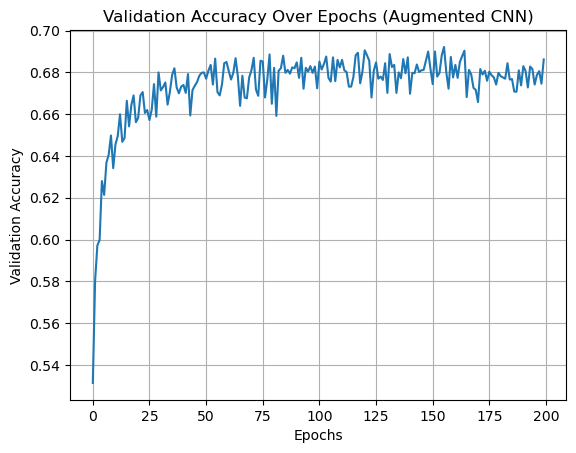

In [63]:
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Over Epochs (Augmented CNN)')
plt.grid(True)
plt.show()

#####  baseline model gives accuracy around 65%. Same model with augmented dataset gives accuracy above 68%.

# Question 4

### 1. Set aside 500 examples from training set of CIFAR10 Dataset

In [78]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test/ 255.0

num_classes = 10
num_examples_per_class = 50
num_selected_examples = num_classes * num_examples_per_class

selected_indices = []
for class_label in range(num_classes):
    class_indices = np.where(y_train == class_label)[0]
    selected_indices.extend(class_indices[-num_examples_per_class:])

x_select_500 = x_train[selected_indices]
y_select_500 = y_train[selected_indices]


In [79]:
print(x_select_500.shape)

(500, 32, 32, 3)


### 3. The Pretext Task

In [80]:
# Class 0
x_train_original = x_train[:49500]

num_samples = x_train_original.shape[0]
class_mapping = {0: 0, 1: 1, 2: 2}
y_train_original = np.full((num_samples, 1), class_mapping[0])

y_test_original = np.full((x_test.shape[0], 1), class_mapping[0])

new_classes = [0, 1, 2]

# Class 1
x_train_flip = np.flip(x_train_original,1)
y_train_flip = np.full((num_samples, 1), class_mapping[1])

x_test_flip = np.flip(x_test,1)
y_test_flip = np.full((x_test.shape[0], 1), class_mapping[1])


# Class 2
x_train_rotate = np.rot90(x_train_original, k=1, axes=(1, 2))
y_train_rotate = np.full((num_samples, 1), class_mapping[2])

x_test_rotate = np.rot90(x_test, k=1, axes=(1, 2))
y_test_rotate = np.full((x_test.shape[0], 1), class_mapping[2])

# Combine original and new classes
x_train_extended = np.vstack((x_train_original, x_train_flip, x_train_rotate))
y_train_extended = np.vstack((y_train_original, y_train_flip, y_train_rotate))


x_test_extended = np.vstack((x_test, x_test_flip, x_test_rotate))
y_test_extended = np.vstack((y_test_original, y_test_flip, y_test_rotate))


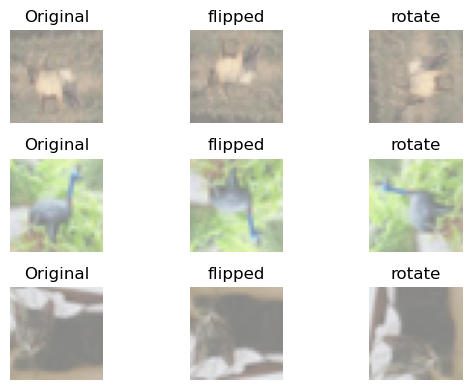

In [81]:
titles = ['Original', 'flipped', 'rotate']
sample_indices = [3,6,9]  # You can adjust these indices as needed

fig, axes = plt.subplots(len(sample_indices), 3, figsize=(6, 4))

for i, index in enumerate(sample_indices):
    axes[i, 0].imshow((x_train_original[index] + 1) / 2)  
    axes[i, 0].set_title(titles[0])
    
    axes[i, 1].imshow((x_train_flip[index] + 1) / 2)
    axes[i, 1].set_title(titles[1])
    
    axes[i, 2].imshow((x_train_rotate[index] + 1) / 2)
    axes[i, 2].set_title(titles[2])
    
for j in range(3):
    axes[0, j].set_title(titles[j])

for ax in axes.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()


In [82]:
model = models.Sequential([
    layers.Conv2D(10, (5, 5), activation='relu', kernel_initializer='he_normal',input_shape=(32, 32, 3),strides=(1, 1)
),  layers.MaxPooling2D((2, 2), strides=(2, 2)),
    layers.Conv2D(10, (5, 5), activation='relu', kernel_initializer='he_normal',  strides=(1, 1)),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(20, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(3, activation='softmax', kernel_initializer='he_normal')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 100  
batch_size = 32
history = model.fit(x_train_extended, y_train_extended, epochs=epochs,batch_size=batch_size,validation_data=(x_test_extended,y_test_extended))

Epoch 1/100
4641/4641 [==============================] - 17s 4ms/step - loss: 0.9592 - accuracy: 0.5232 - val_loss: 0.8868 - val_accuracy: 0.5769
Epoch 2/100
4641/4641 [==============================] - 16s 3ms/step - loss: 0.8648 - accuracy: 0.5927 - val_loss: 0.8554 - val_accuracy: 0.5955
Epoch 3/100
4641/4641 [==============================] - 16s 3ms/step - loss: 0.8301 - accuracy: 0.6168 - val_loss: 0.8195 - val_accuracy: 0.6269
Epoch 4/100
4641/4641 [==============================] - 16s 3ms/step - loss: 0.8122 - accuracy: 0.6291 - val_loss: 0.8110 - val_accuracy: 0.6350
Epoch 5/100
4641/4641 [==============================] - 16s 3ms/step - loss: 0.7992 - accuracy: 0.6385 - val_loss: 0.7990 - val_accuracy: 0.6384
Epoch 6/100
4641/4641 [==============================] - 16s 3ms/step - loss: 0.7892 - accuracy: 0.6453 - val_loss: 0.7944 - val_accuracy: 0.6403
Epoch 7/100
4641/4641 [==============================] - 16s 3ms/step - loss: 0.7796 - accuracy: 0.6505 - val_loss: 0.7939 -

In [83]:
model_path = 'models/q4_pretext_model.h5'  
model.save(model_path)

print("Model saved to", model_path)


Model saved to models/q4_pretext_model.h5


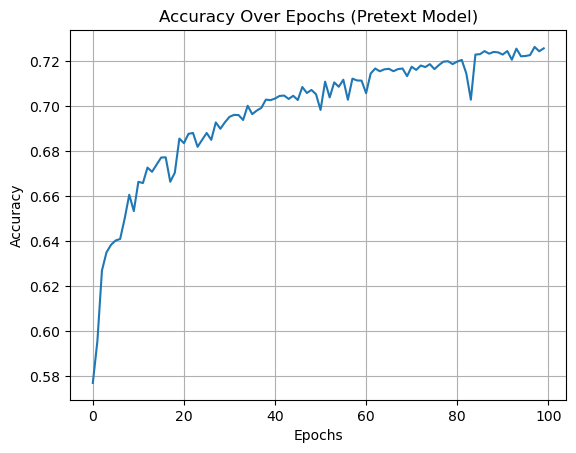

In [84]:
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs (Pretext Model)')
plt.grid(True)
plt.show()

### 4. The Baseline Model

In [11]:
model = models.Sequential([
    layers.Conv2D(10, (5, 5), activation='relu', kernel_initializer='he_normal',input_shape=(32, 32, 3),strides=(1, 1)
),  layers.MaxPooling2D((2, 2), strides=(2, 2)),
    layers.Conv2D(10, (5, 5), activation='relu', kernel_initializer='he_normal',  strides=(1, 1)),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(20, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(10, activation='softmax', kernel_initializer='he_normal')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

epochs = 10000
history = model.fit(x_select_500, y_select_500, epochs=epochs, validation_data=(x_test,y_test))

Epoch 1/10000
16/16 [==============================] - 2s 89ms/step - loss: 2.3265 - accuracy: 0.1240 - val_loss: 2.3018 - val_accuracy: 0.1075
Epoch 2/10000
16/16 [==============================] - 1s 48ms/step - loss: 2.2982 - accuracy: 0.1100 - val_loss: 2.2970 - val_accuracy: 0.1179
Epoch 3/10000
16/16 [==============================] - 1s 47ms/step - loss: 2.2808 - accuracy: 0.1460 - val_loss: 2.2907 - val_accuracy: 0.1175
Epoch 4/10000
16/16 [==============================] - 1s 47ms/step - loss: 2.2615 - accuracy: 0.1540 - val_loss: 2.2776 - val_accuracy: 0.1351
Epoch 5/10000
16/16 [==============================] - 1s 48ms/step - loss: 2.2160 - accuracy: 0.1720 - val_loss: 2.2501 - val_accuracy: 0.1480
Epoch 6/10000
16/16 [==============================] - 1s 48ms/step - loss: 2.1505 - accuracy: 0.2440 - val_loss: 2.1944 - val_accuracy: 0.2017
Epoch 7/10000
16/16 [==============================] - 1s 47ms/step - loss: 2.0494 - accuracy: 0.2980 - val_loss: 2.1472 - val_accuracy:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



16/16 [==============================] - 1s 48ms/step - loss: 1.2159e-08 - accuracy: 1.0000 - val_loss: 21.7759 - val_accuracy: 0.3107
Epoch 4329/10000
16/16 [==============================] - 1s 48ms/step - loss: 1.3113e-08 - accuracy: 1.0000 - val_loss: 21.8604 - val_accuracy: 0.3097
Epoch 4330/10000
16/16 [==============================] - 1s 48ms/step - loss: 1.3828e-08 - accuracy: 1.0000 - val_loss: 21.9404 - val_accuracy: 0.3120
Epoch 4331/10000
16/16 [==============================] - 1s 48ms/step - loss: 1.8358e-08 - accuracy: 1.0000 - val_loss: 21.9223 - val_accuracy: 0.3087
Epoch 4332/10000
16/16 [==============================] - 1s 48ms/step - loss: 1.5497e-08 - accuracy: 1.0000 - val_loss: 22.0497 - val_accuracy: 0.3113
Epoch 4333/10000
16/16 [==============================] - 1s 48ms/step - loss: 2.5034e-08 - accuracy: 1.0000 - val_loss: 22.1271 - val_accuracy: 0.3070
Epoch 4334/10000
16/16 [==============================] - 1s 48ms/step - loss: 1.4173 - accuracy: 0.9360 

In [12]:
model_path = 'models/q4_baseline_model.h5'  
model.save(model_path)
print("Model saved to", model_path)

Model saved to models/q4_baseline_model.h5


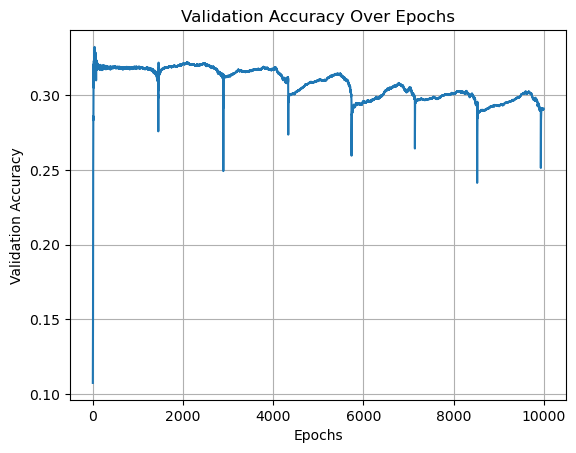

In [13]:
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.grid(True)
plt.show()

### 5. The Transfer Learning Task

In [7]:
baseline_model = tf.keras.models.load_model('models/q4_baseline_model.h5')
pretext_model = tf.keras.models.load_model('models/q4_pretext_model.h5')

transfer_model = tf.keras.Sequential()

for layer in pretext_model.layers[:-1]:
    transfer_model.add(layer)

transfer_model.add(layers.Dense(10, activation='softmax', kernel_initializer='he_normal'))



In [8]:
learning_rate_transfer = 1e-6  
learning_rate_final_layer = 1e-3  

optimizer_transfer = tf.keras.optimizers.Adam(learning_rate=learning_rate_transfer)
optimizer_final_layer = tf.keras.optimizers.Adam(learning_rate=learning_rate_final_layer)

transfer_layers = transfer_model.layers[:-1]
final_layer = transfer_model.layers[-1]

for layer in transfer_layers:
    transfer_model.get_layer(layer.name).trainable = True
    transfer_model.get_layer(layer.name).optimizer = optimizer_transfer

final_layer.trainable = True
final_layer.optimizer = optimizer_final_layer

transfer_model.compile(loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

epochs = 10000  
history = transfer_model.fit(x_select_500, y_select_500, epochs=epochs, validation_data=(x_test,y_test))


Epoch 1/10000
16/16 [==============================] - 2s 61ms/step - loss: 2.4851 - accuracy: 0.1120 - val_loss: 2.3388 - val_accuracy: 0.1223
Epoch 2/10000
16/16 [==============================] - 1s 37ms/step - loss: 2.2953 - accuracy: 0.1360 - val_loss: 2.2929 - val_accuracy: 0.1328
Epoch 3/10000
16/16 [==============================] - 1s 37ms/step - loss: 2.2263 - accuracy: 0.1700 - val_loss: 2.2606 - val_accuracy: 0.1637
Epoch 4/10000
16/16 [==============================] - 1s 37ms/step - loss: 2.1810 - accuracy: 0.2200 - val_loss: 2.2180 - val_accuracy: 0.1740
Epoch 5/10000
16/16 [==============================] - 1s 36ms/step - loss: 2.0897 - accuracy: 0.2360 - val_loss: 2.1786 - val_accuracy: 0.2097
Epoch 6/10000
16/16 [==============================] - 1s 36ms/step - loss: 2.0393 - accuracy: 0.2900 - val_loss: 2.1503 - val_accuracy: 0.2259
Epoch 7/10000
16/16 [==============================] - 1s 36ms/step - loss: 1.9619 - accuracy: 0.3040 - val_loss: 2.1080 - val_accuracy:

In [9]:
model_path = 'models/q4_transfer_model.h5'  
transfer_model.save(model_path)
print("Model saved to", model_path)

Model saved to models/q4_transfer_model.h5


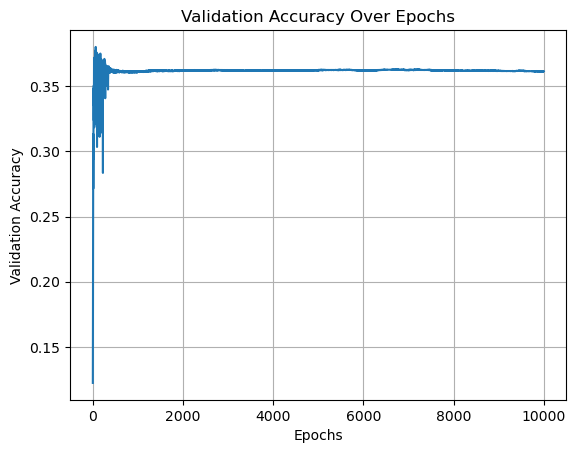

In [10]:
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.grid(True)
plt.show()

##### Tranfer learning model improves the accuracy compared to baseline model. baseline model accuracy is around 30%. Transfer learning model accuracy is 36%.